# Basic testing of the library

In [1]:
from SynGenLoss.Model1 import AabjoraModel as Aabj1
from SynGenLoss.Model2 import AabjoraModel as Aabj2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
G1 = Aabj1() 
G2 = Aabj2() 

In [3]:
P = 0.9 
Q = np.tan(np.arccos(P))*P
V = 1.0
Ia, If, delta = G1.calc_currents(P, Q, V)
print(f"Ia = {(Ia*5406):.2f} A, If = {(If*525.15):.2f} A, delta = {delta:.2f} rad")
delta, X_d, X_q, i_d, i_q, i_fd = G2.calculate(P, Q, V)
print(f"Ia = {(np.sqrt(i_d**2 + i_q**2)*5406):.2f} A, If = {(i_fd*525.15):.2f} A, delta = {delta:.2f} rad")

Ia = 5406.00 A, If = 1064.93 A, delta = 0.44 rad
Ia = 5406.00 A, If = 1048.96 A, delta = 0.40 rad


In [4]:
n_real = 0.98834 
P_loss_real = 1094.02 #kW
n, P_st, P_rot, P_con = G1.calc_losses_pu(P, Q, 1.0)
P_loss = P_st + P_rot + P_con 
print(f"Deviations: n = {(n*100-n_real*100):.2f} %, Error in P_loss = {(P_loss*103000-P_loss_real):.2f} kW")
n, P_st, P_rot, P_con = G2.calc_losses_pu(P, Q, 1.0)
P_loss = P_st + P_rot + P_con 
print(f"Deviations: n = {(n*100-n_real*100):.2f} %, Error in P_loss = {(P_loss*103000-P_loss_real):.2f} kW")

Deviations: n = 0.00 %, Error in P_loss = -1.02 kW
Deviations: n = 0.01 %, Error in P_loss = -6.49 kW


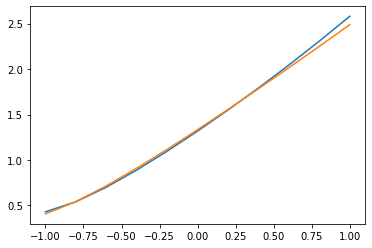

In [5]:
P = 0.5 
V = 1.0
Q_g = np.linspace(-1, 1, 11)
i_fd_vals_G1 = []
i_fd_vals_G2 = []

for Q in Q_g: 
    Ia, i_fd, delta = G1.calc_currents(P, Q, V)
    i_fd_vals_G1.append(i_fd) 
    delta, X_d, X_q, i_d, i_q, i_fd = G2.calculate(P, Q, V)
    # I_t, i_d, i_q, phi, e_d, e_q, delta, psi_d, psi_q, i_fd, e_fd = G2.init_no_sat(P, Q, V)
    i_fd_vals_G2.append(i_fd) 
    
plt.plot(Q_g, i_fd_vals_G1)
plt.plot(Q_g, i_fd_vals_G2)

In [6]:
S_nom = 103 # MVA 
Ia_nom = 5606.1 # A 
V_nom = 11 # kV 

P_vals =    np.array([0.9, 0.675, 0.45, 0.225, 1.0, 0.75, 0.5, 0.25])
Q_vals =    np.array([0.436, 0.327, 0.218, 0.109, 0.0, 0.0, 0.0, 0.0] )
Ia_vals =   np.array([5406.1, 4054.6, 2703.0, 1351.5, 5406.1, 4054.6, 2703.0, 1351.5])
I_fd_vals = np.array([1065, 936.12, 816.18, 711.38, 873.17, 776.61, 698.7, 646.84])

# Loss values: All in kW 
P_f =       np.array([173.65, 133.66, 101.61, 77.19, 116.29, 91.99, 74.48, 63.81])
P_ex =      np.array([15.88, 13.02, 10.72, 8.87, 11.65, 9.92, 8.68, 7.92])
P_br =      np.array([2.13, 1.87, 1.63, 1.42, 1.75, 1.55, 1.40, 1.29])
P_a =       np.array([187.46, 105.45, 46.86, 11.72, 187.46, 105.45, 46.86, 11.72])
P_s =       np.array([89.16, 50.15, 22.30, 5.57, 89.16, 50.15, 22.30, 5.57])
P_c =       np.array([211.92]*8 )
P_be =      np.array([240.90]*8)
P_wf =      np.array([172.92]*8)

P_stator_vals = P_a + P_s 
P_rotor_vals = P_f + P_ex + P_br 
P_const_vals = P_c + P_be + P_wf

P_stator_G1 = [] 
P_stator_G2 = [] 
P_rotor_G1  = [] 
P_rotor_G2  = [] 
P_const_G1  = [] 
P_const_G2  = [] 

In [7]:
for P, Q in zip(P_vals, Q_vals): 
    n, P_st, P_rt, P_cn = G1.calc_losses_pu(P, Q, 1.0)
    P_stator_G1.append(P_st*S_nom*1000)
    P_rotor_G1.append(P_rt*S_nom*1000)
    P_const_G1.append(P_cn*S_nom*1000)
    n, P_st, P_rt, P_cn = G2.calc_losses_pu(P, Q, 1.0) 
    P_stator_G2.append(P_st*S_nom*1000)
    P_rotor_G2.append(P_rt*S_nom*1000)
    P_const_G2.append(P_cn*S_nom*1000)

P_stator_G1 = np.array(P_stator_G1).round(3)
P_stator_G2 = np.array(P_stator_G2).round(3)
P_rotor_G1  = np.array(P_rotor_G1 ).round(3)
P_rotor_G2  = np.array(P_rotor_G2 ).round(3)
P_const_G1  = np.array(P_const_G1 ).round(3)
P_const_G2  = np.array(P_const_G2 ).round(3)
  
print("Summary for G1")
print(f"Error in P_stator [kW]: ", sum(P_stator_vals - P_stator_G1) )
print("Error in P_rotor [kW]: ", sum(P_rotor_vals - P_rotor_G1))
print("")
print("Summary for G2")
print(f"Error in P_stator [kW]: ", sum(P_stator_vals - P_stator_G2 ))
print("Error in P_rotor [kW]: ", sum(P_rotor_vals - P_rotor_G2))

Summary for G1
Error in P_stator [kW]:  3.7159999999999727
Error in P_rotor [kW]:  0.1220000000000141

Summary for G2
Error in P_stator [kW]:  3.7159999999999727
Error in P_rotor [kW]:  -0.018000000000000682


In [8]:
delta, X_d, X_q, i_d, i_q, i_fd = G2.calculate(0.9, 0.436, 1.0)
i_fd

1.9613984432993343

In [1]:
from SynGenLoss.Model1.aabjora_model import AabjoraModel 
from SynGenLoss.Model1.CapDiag_v2 import CapabilityDiagram as CD_v2
from SynGenLoss.Model1.CapDiag import CapabilityDiagram as CD 
import numpy as np 
import cmath as cm
import matplotlib.pyplot as plt 

In [2]:
G1 = AabjoraModel() 
CD1 = CD_v2(G1.md, G1.satmodel)
CD_ref = CD(G1.md, G1.satmodel)

In [3]:
P = 0.9
V = 1.0

print(CD_ref.get_Q_lims(V, P))
print(CD1.get_Q_lims(V, P))

(0.9, array(-0.43588908), array(0.43588908))
(-0.4358898943540673, 0.41171535649679736)


c:\Users\emelf\OneDrive - USN\PhD - SysOpt\Python Work\Custom Modules\SynGenLoss_v2\SynGenLoss\Model1\CapDiag_v2.py:29: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)
c:\Users\emelf\OneDrive - USN\PhD - SysOpt\Python Work\Custom Modules\SynGenLoss_v2\SynGenLoss\Model1\CapDiag_v2.py:29: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)
c:\Users\emelf\OneDrive - USN\PhD - SysOpt\Python Work\Custom Modules\SynGenLoss_v2\SynGenLoss\Model1\CapDiag_v2.py:29: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)


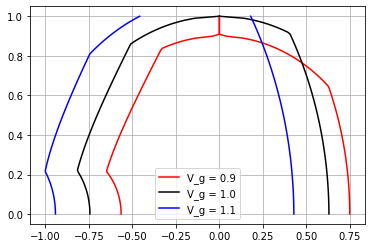

In [11]:
P_vals = np.linspace(1e-3, 1.0, 100)
def plot_CD(ax, P_vals, V_g, N_vals, color, label): 
    Q_min_vals = [] 
    Q_max_vals = [] 
    for P in P_vals: 
        Q_min, Q_max = CD1.get_Q_lims(V_g, P)
        Q_min_vals.append(Q_min)
        Q_max_vals.append(Q_max) 
    ax.plot(Q_min_vals, P_vals, color=color, label=label)
    ax.plot(Q_max_vals, P_vals, color=color)
    
fig, ax = plt.subplots(1, 1)

plot_CD(ax, P_vals, 0.9, 1000, color="red", label="V_g = 0.9")
plot_CD(ax, P_vals, 1.0, 1000, color="black", label="V_g = 1.0")
plot_CD(ax, P_vals, 1.1, 1000, color="blue", label="V_g = 1.1")

ax.legend()
ax.grid() 

plt.show() 

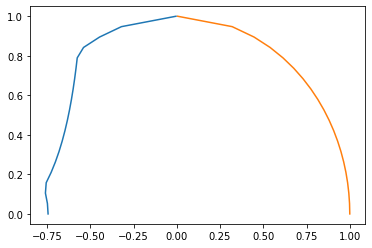

In [7]:
P_vals = np.linspace(0.0, 1.0, 20)
Q_min_vals = [] 
Q_max_vals = [] 

for P in P_vals: 
    P_, Q_min, Q_max = CD_ref.get_Q_lims(V, P)
    Q_min_vals.append(Q_min)
    Q_max_vals.append(Q_max) 
    
plt.plot(Q_min_vals, P_vals)
plt.plot(Q_max_vals, P_vals)